In [2]:
%matplotlib notebook

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import IPython
from scipy.signal import spectrogram, lfilter
from scipy.io import wavfile

<IPython.core.display.Javascript object>


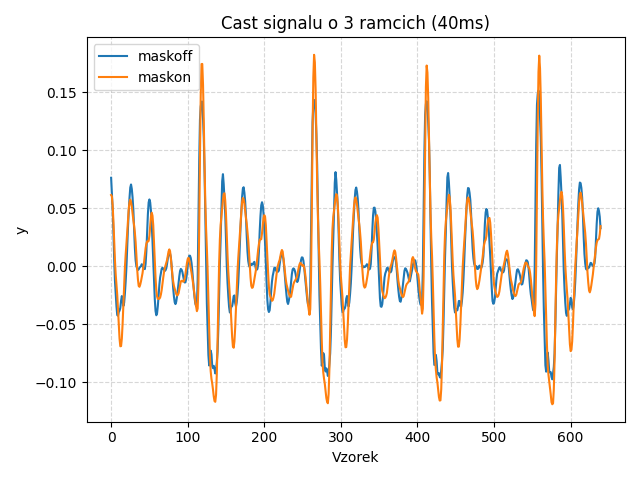

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [4]:
off_tone = wavfile.read('../audio/maskoff_tone.wav')[1]
off_tone = off_tone[:16000]
on_tone = wavfile.read('../audio/maskon_tone.wav')[1]
#------------------------------------------------------------------------
# #Cross-korelace
# correlated = np.correlate(on_tone,off_tone)
# max_index = np.argmax(correlated)
# on_tone = on_tone[max_index:max_index+16000]
#------------------------------------------------------------------------
# Normalizace
on_tone_uprav = on_tone / 2**15
off_tone_uprav = off_tone / 2**15
#------------------------------------------------------------------------
# Ustredneni
on_tone_uprav -= np.mean(on_tone_uprav)
off_tone_uprav -= np.mean(off_tone_uprav)
#------------------------------------------------------------------------
# Rozdeleni na ramce
framesize= int(0.020 * 16000)
rows, cols = (99, framesize) 
###vytvoreni novych poli
on_tone_ramce = [[0 for i in range(cols)] for j in range(rows)] 
off_tone_ramce = [[0 for i in range(cols)] for j in range(rows)] 
on_tone_ramce_orig = [[0 for i in range(cols)] for j in range(rows)] 
off_tone_ramce_orig = [[0 for i in range(cols)] for j in range(rows)] 
###vzorec pro v´ypoˇcet velikosti r´amce ve vzorc´ıch
sampleCounter=0
for ramecCntr in range(rows):
    for vzorekCntr in range(cols):
        on_tone_ramce_orig[ramecCntr][vzorekCntr] = on_tone[sampleCounter]
        off_tone_ramce_orig[ramecCntr][vzorekCntr] = off_tone[sampleCounter]
        on_tone_ramce[ramecCntr][vzorekCntr] = on_tone_uprav[sampleCounter]
        off_tone_ramce[ramecCntr][vzorekCntr] = off_tone_uprav[sampleCounter]
        sampleCounter += 1
    sampleCounter -= 160
# for row in on_tone_ramce: 
#       print(row) 
#------------------------------------------------------------------------
#Graf
plt.figure()
plt.plot(off_tone_uprav[0:640], label="maskoff")
plt.plot(on_tone_uprav[0:640], label="maskon")
plt.legend()
plt.grid(alpha=0.5, linestyle='--')
plt.gca().set_title('Cast signalu o 3 ramcich (40ms)')
plt.xlabel("Vzorek")
plt.ylabel("y")
plt.tight_layout()
plt.savefig('ukol3.eps')
#plt.show()


<IPython.core.display.Javascript object>


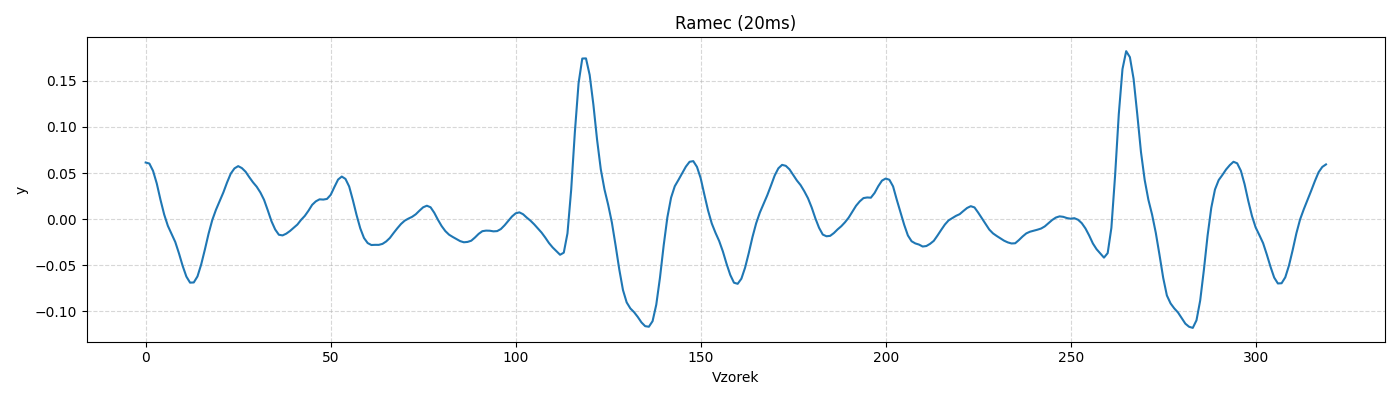

<IPython.core.display.Javascript object>


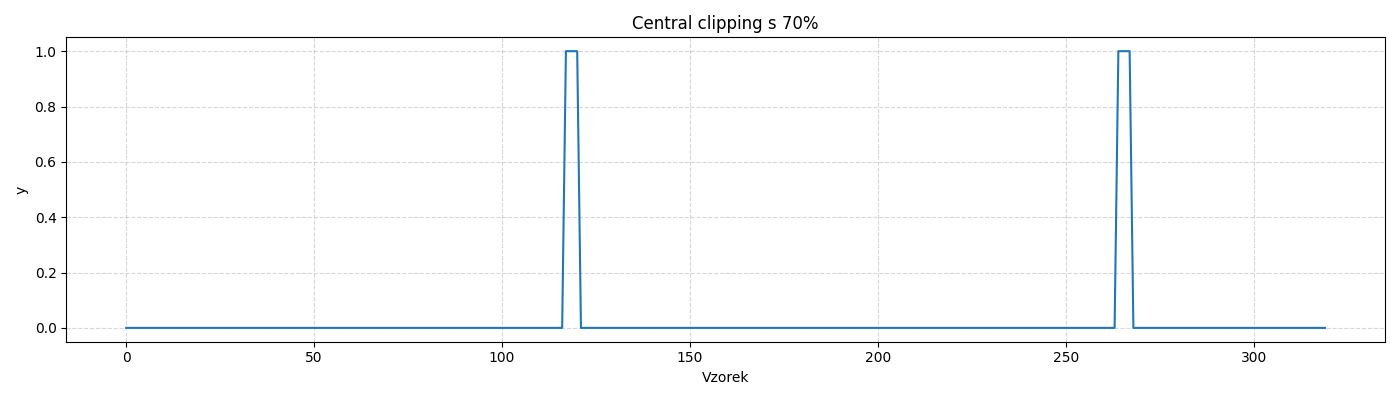

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

<IPython.core.display.Javascript object>

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

<IPython.core.display.Javascript object>


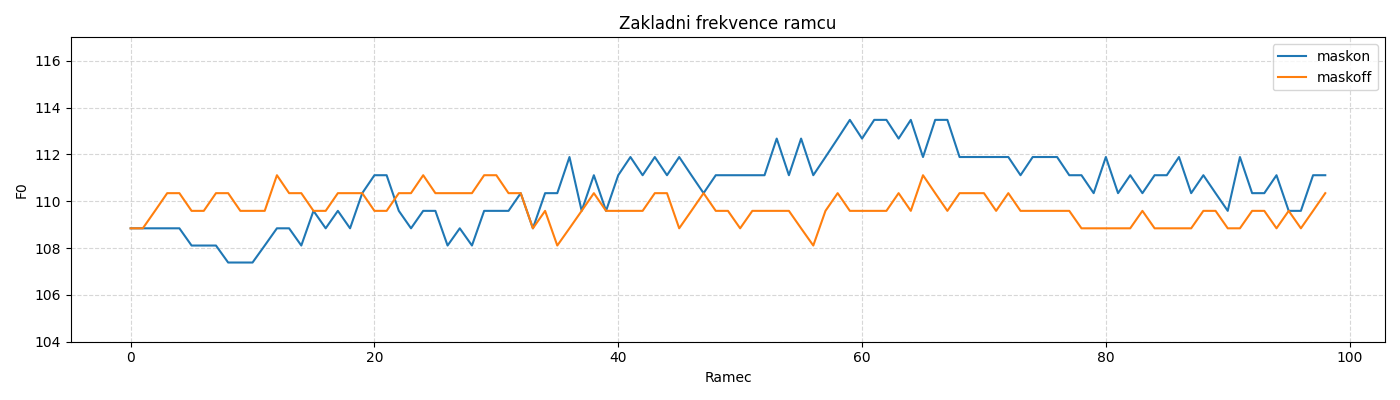

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

Rozptyl on/off: 2.3350663396024793 / 0.42705162093162236
Stredni hodnota on/off: 110.57392157887492 / 109.7067806787311


In [5]:
#UKOL 4 
#------------------------------------------------------------------------
#Center clipping
on_tone_clipped = [[0 for i in range(cols)] for j in range(rows)] 
off_tone_clipped = [[0 for i in range(cols)] for j in range(rows)] 
#off_tone_clipped = [[0 for i in range(cols)] for j in range(rows)] 
for ramecCntr in range(rows):
    ramecOnMax = (max(np.absolute(on_tone_ramce[ramecCntr]))*0.7)
    ramecOffMax = (max(np.absolute(off_tone_ramce[ramecCntr]))*0.7)
    
#     print("ramecOnMax:",ramecOnMax)
#     print("ramecOnMin:",ramecOnMin)
    for vzorekCntr in range(cols):
#         print("Max:",ramecOnMax,"Min:",ramecOnMin)
        if on_tone_ramce[ramecCntr][vzorekCntr] > ramecOnMax:
            on_tone_clipped[ramecCntr][vzorekCntr] = 1
        elif on_tone_ramce[ramecCntr][vzorekCntr] < -ramecOnMax:
            on_tone_clipped[ramecCntr][vzorekCntr] = -1
        else:
            on_tone_clipped[ramecCntr][vzorekCntr] = 0
            
        if off_tone_ramce[ramecCntr][vzorekCntr] > ramecOffMax:
            off_tone_clipped[ramecCntr][vzorekCntr] = 1
        elif off_tone_ramce[ramecCntr][vzorekCntr] <  -ramecOffMax:
            off_tone_clipped[ramecCntr][vzorekCntr] = -1
        else:
            off_tone_clipped[ramecCntr][vzorekCntr] = 0
#         print("Kontrolovano:",on_tone_ramce[ramecCntr][vzorekCntr],"Vysledek:",on_tone_clipped[ramecCntr][vzorekCntr])
#         print("------------------")
#------------------------------------------------------------------------
#Graf centre clippingu a originalniho ramce
plt.figure(figsize=(14,4))
plt.plot(on_tone_ramce[0])
plt.grid(alpha=0.5, linestyle='--')
plt.gca().set_title('Ramec (20ms)')
plt.xlabel("Vzorek")
plt.ylabel("y")
plt.tight_layout()
#plt.savefig('ukol4_orig.eps')
plt.figure(figsize=(14,4))
plt.plot(on_tone_clipped[0])
plt.grid(alpha=0.5, linestyle='--')
plt.gca().set_title('Central clipping s 70%')
plt.xlabel("Vzorek")
plt.ylabel("y")
plt.tight_layout()
plt.savefig('ukol4_clipped.eps')
#------------------------------------------------------------------------
#Autokorelace
on_tone_correlated = [[0 for i in range(cols)] for j in range(rows)] 
off_tone_correlated = [[0 for i in range(cols)] for j in range(rows)] 

#R(m)=sum[n=0][N-1-m](s(n)*s(n+m))
for ramecCntr in range(rows):
    N=320
    for vzorekCntr in range(cols):
        m = vzorekCntr
        horniIndex=N-1-m
        #Suma
        for n in range(horniIndex):
            hodnota = on_tone_clipped[ramecCntr][n]*on_tone_clipped[ramecCntr][n+m]
            on_tone_correlated[ramecCntr][m] += hodnota
            hodnota = off_tone_clipped[ramecCntr][n]*off_tone_clipped[ramecCntr][n+m]
            off_tone_correlated[ramecCntr][m] += hodnota
#------------------------------------------------------------------------
#Prah a Lag prvniho ramce
#lag = arg max R(m)
prah = 25
lags_on = [prah for i in range(99)] #Misto lagu pro kazdy ramec
lags_off = [prah for i in range(99)] #Misto lagu pro kazdy ramec

for ramecCntr in range(rows):
    for vzorekCntr in range(prah,cols):
        if on_tone_correlated[ramecCntr][vzorekCntr] >  on_tone_correlated[ramecCntr][lags_on[ramecCntr]]:
            lags_on[ramecCntr] = vzorekCntr
        if off_tone_correlated[ramecCntr][vzorekCntr] >  off_tone_correlated[ramecCntr][lags_off[ramecCntr]]:
            lags_off[ramecCntr] = vzorekCntr
#for row in lags_on: 
  #   print(row)   
# for row in on_tone_clipped: 
#     print(row)
plt.figure(figsize=(14,4))
plt.plot([prah, prah], [-8,25], 'k-', lw=2 , label="prah")
plt.plot([lags_on[0], lags_on[0]], [-8,on_tone_correlated[0][lags_on[0]]], 'r-', lw=2, label="lag")
plt.plot(on_tone_correlated[0])
plt.grid(alpha=0.5, linestyle='--')
plt.gca().set_title('Autokorelace')
plt.xlabel("Vzorek")
plt.ylabel("y")
plt.tight_layout()
plt.legend()
plt.savefig('ukol4_autokorel.eps')
#------------------------------------------------------------------------
#Zakladni frekvence
fzero_on = [0 for i in range(99)] 
fzero_off = [0 for i in range(99)] #Misto lagu pro kazdy ramec

for ramecCntr in range(rows):
    fzero_on[ramecCntr] = 16000/lags_on[ramecCntr]
    fzero_off[ramecCntr] = 16000/lags_off[ramecCntr]

plt.figure(figsize=(14,4))
plt.plot(fzero_on, label="maskon")
plt.plot(fzero_off, label="maskoff")
plt.grid(alpha=0.5, linestyle='--')
plt.ylim([104, 117])
plt.gca().set_title('Zakladni frekvence ramcu')
plt.xlabel("Ramec")
plt.ylabel("F0")
plt.tight_layout()
plt.legend()
plt.savefig('ukol4_zaklfrekv.eps')

#------------------------------------------------------------------------
#Stredni hodnota a rozptyl
stredHodnota_on=np.mean(fzero_on)
stredHodnota_off=np.mean(fzero_off)
rozptyl_on=np.var(fzero_on)
rozptyl_off=np.var(fzero_off)

print("Rozptyl on/off:",rozptyl_on,"/",rozptyl_off)
print("Stredni hodnota on/off:",stredHodnota_on,"/",stredHodnota_off)



In [6]:
#UKOL 5
#------------------------------------------------------------------------
#G = 10 * np.log10(1/N * np.abs(s_seg_spec)**2)
N = 1024
#------------------------------------------------------------------------
#Vytvoreni zeropadded ramcu kvuli rozsireni na 1024 vzorku
on_tone_ramce_padded = [[0 for i in range(N)] for j in range(rows)] 
off_tone_ramce_padded = [[0 for i in range(N)] for j in range(rows)] 
for ramecCntr in range(rows):
    for vzorekCntr in range(cols):
        on_tone_ramce_padded[ramecCntr][vzorekCntr] =  on_tone_ramce_orig[ramecCntr][vzorekCntr]
        off_tone_ramce_padded[ramecCntr][vzorekCntr] =  off_tone_ramce_orig[ramecCntr][vzorekCntr] 
#------------------------------------------------------------------------
#Vytvoreni ramcu pro vysledek DFT a FFT
on_tone_dft = [[0 for i in range(N)] for j in range(rows)] 
off_tone_dft = [[0 for i in range(N)] for j in range(rows)]
on_tone_fft = [[0 for i in range(N)] for j in range(rows)] 
off_tone_fft = [[0 for i in range(N)] for j in range(rows)] 
#------------------------------------------------------------------------
#Spektrum kazdeho ramce pomoci DFT/FFT
#FFT
for ramecCntr in range(rows):
    on_tone_fft[ramecCntr]  = np.fft.fft(on_tone_ramce_padded[ramecCntr],n=N)
    off_tone_fft[ramecCntr]  = np.fft.fft(off_tone_ramce_padded[ramecCntr],n=N)
#DFT
for ramecCntr in range(rows):
    for vzorekCntr in range(N-1):
        k=vzorekCntr
        for n in range(N-1): 
            on_tone_dft[ramecCntr][k] += on_tone_ramce_padded[ramecCntr][n]*np.e**(-2*1j*np.pi*(k/N)*n)
            off_tone_dft[ramecCntr][k] += off_tone_ramce_padded[ramecCntr][n]*np.e**(-2*1j*np.pi*(k/N)*n)

#             if ramecCntr==0 & vzorekCntr<5:
#                 print("n:",n,"hodnota+:",on_tone_ramce_padded[ramecCntr][n]*np.e**(-2*1j*np.pi*(k/320)*n))
#                 print("on_tone_ramce_padded[ramecCntr][n]:",on_tone_ramce_padded[ramecCntr][n],"*np.e**-2*1j*np.pi*(k/320)*n",np.e**-2*1j*np.pi*(k/320)*n)
                  #print("-2*1j:",-2*1j, "-2*1j*np.pi:",-2*1j*np.pi, "-2*1j*np.pi*(k/320):",-2*1j*np.pi*(k/320), "-2*1j*np.pi*(k/320)*n:",-2*1j*np.pi*(k/320) *n)

            #Xk=sum[0][N-1](Xn*e^(-k*n*((i*2pi)/N)))
#------------------------------------------------------------------------
#Vsechny spektra
on_tone_dft_full = [0 for i in range(512*rows)]
off_tone_dft_full = [0 for i in range(512*rows)]
on_tone_fft_full = [0 for i in range(512*rows)]
off_tone_fft_full = [0 for i in range(512*rows)]
#Naplneni
sampleCounter=0
for ramecCntr in range(rows):
    for vzorekCntr in range(512):
        on_tone_dft_full[sampleCounter] = on_tone_dft[ramecCntr][vzorekCntr]
        off_tone_dft_full[sampleCounter] = off_tone_dft[ramecCntr][vzorekCntr]
        on_tone_fft_full[sampleCounter] = on_tone_fft[ramecCntr][vzorekCntr]
        off_tone_fft_full[sampleCounter] = off_tone_fft[ramecCntr][vzorekCntr]
        sampleCounter += 1
for vzorekCntr in range(512*rows):
    off_tone_dft_full[vzorekCntr] = 10 * np.log10(np.abs((off_tone_dft_full[vzorekCntr])**2)+1e-20)
    on_tone_dft_full[vzorekCntr] = 10 * np.log10(np.abs((on_tone_dft_full[vzorekCntr])**2)+1e-20)
    off_tone_fft_full[vzorekCntr] = 10 * np.log10(np.abs((off_tone_fft_full[vzorekCntr])**2)+1e-20)
    on_tone_fft_full[vzorekCntr] = 10 * np.log10(np.abs((on_tone_fft_full[vzorekCntr])**2)+1e-20)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


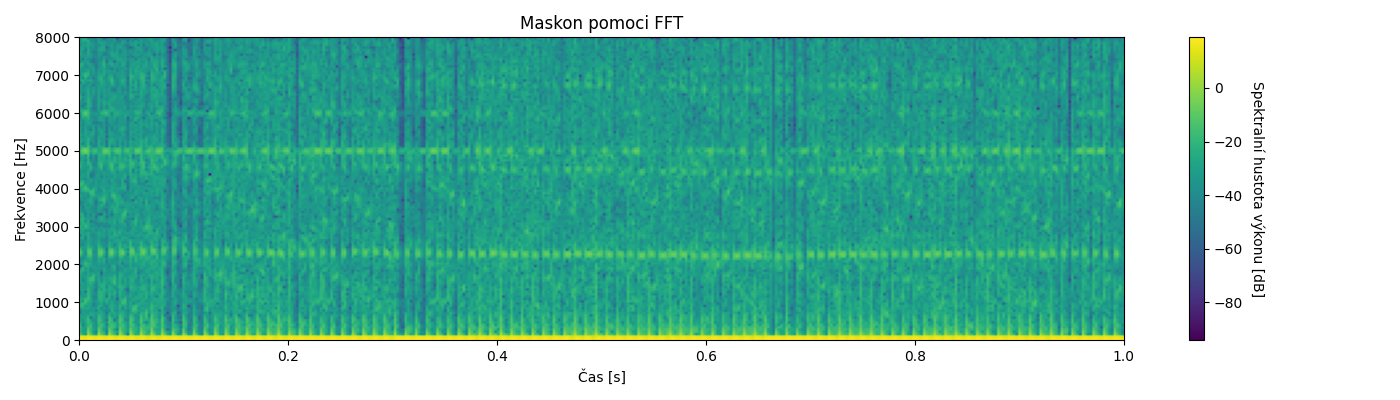

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


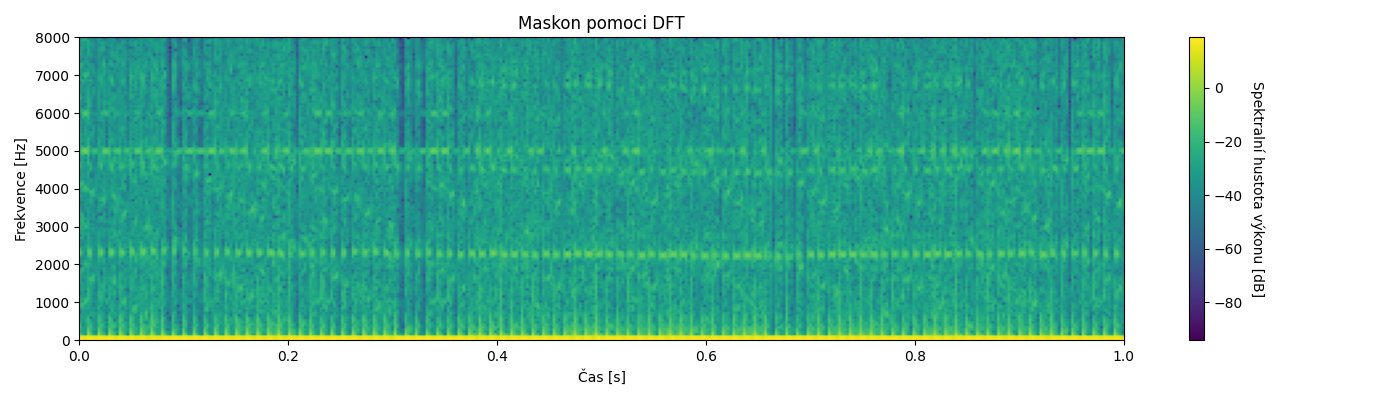

In [7]:
#------------------------------------------------------------------------
#Spectogram

#G = 10 * np.log10(1/N * np.abs(s_seg_spec)**2)
plt.figure(figsize=(14,4))
plt.specgram(off_tone_fft_full,Fs=16000,xextent=(0,1))
plt.title('Maskoff pomoci FFT')
plt.xlabel('Čas [s]')
plt.ylabel('Frekvence [Hz]')
cbar = plt.colorbar()
cbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)
plt.tight_layout()
plt.savefig('ukol5_fft_maskoff.eps')
plt.show() 

plt.figure(figsize=(14,4))
plt.specgram(on_tone_fft_full,Fs=16000,xextent=(0,1))
plt.title('Maskon pomoci FFT')
plt.xlabel('Čas [s]')
plt.ylabel('Frekvence [Hz]')
cbar = plt.colorbar()
cbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)
plt.tight_layout()
plt.savefig('ukol5_fft_maskon.eps')
plt.show()

plt.figure(figsize=(14,4))
plt.specgram(off_tone_dft_full,Fs=16000,xextent=(0,1))
plt.title('Maskoff pomoci DFT')
plt.xlabel('Čas [s]')
plt.ylabel('Frekvence [Hz]')
cbar = plt.colorbar()
cbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)
plt.tight_layout()
plt.savefig('ukol5_dft_maskoff.eps')
plt.show() 

plt.figure(figsize=(14,4))
plt.specgram(on_tone_dft_full,Fs=16000,xextent=(0,1))
plt.title('Maskon pomoci DFT')
plt.xlabel('Čas [s]')
plt.ylabel('Frekvence [Hz]')
cbar = plt.colorbar()
cbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)
plt.tight_layout()
plt.savefig('ukol5_dft_maskon.eps')
plt.show()




<IPython.core.display.Javascript object>


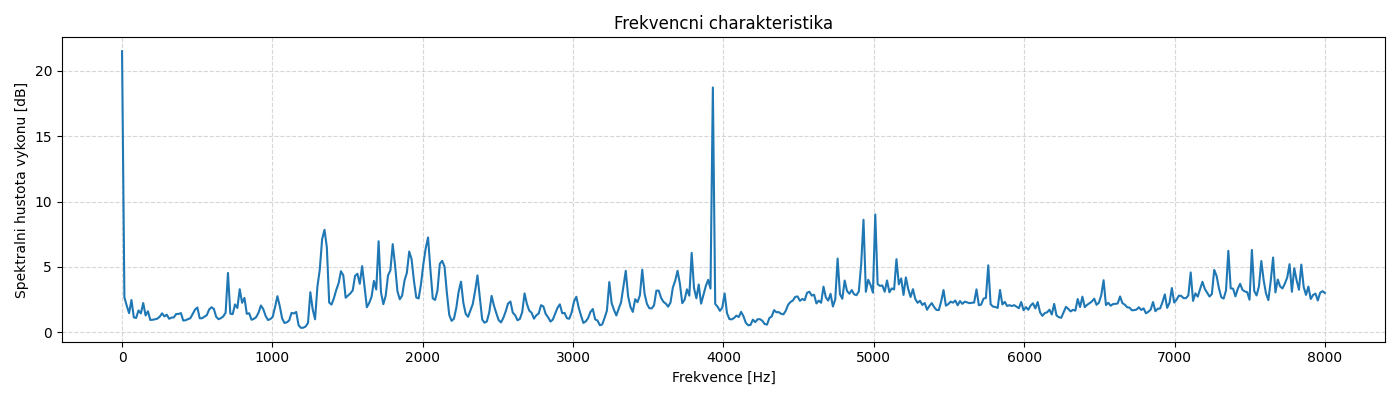

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [8]:
#Ukol 6
#------------------------------------------------------------------------
#------------------------------------------------------------------------
#Pole pro frekvencni charakteristiku, obsahuje podelene koeficienty DFT(rouska)/DFT(rouskaoff)

N=1024
tone_freqchar_frekvence = [[0 for i in range(99)] for j in range(512)] 
tone_freqchar = [0 for i in range(512)]

for vzorekCntr in range(512):
    for ramecCntr in range(99):
        tone_freqchar_frekvence[vzorekCntr][ramecCntr] = np.absolute(on_tone_dft[ramecCntr][vzorekCntr])/np.absolute(off_tone_dft[ramecCntr][vzorekCntr])
    tone_freqchar[vzorekCntr] =  np.average(tone_freqchar_frekvence[vzorekCntr])
# print(tone_freqchar_frekvence[0])
# print("on_tone_dft[0][0]",on_tone_dft[0][0],"off_tone_dft[0][0]",off_tone_dft[0][0])   
# print("ABS:",np.absolute(on_tone_dft[0][0]),"/",np.absolute(off_tone_dft[0][0]))       
# print("np.absolute(on_tone_dft[0][0]/np.absolute(off_tone_dft[0][0]",np.absolute(on_tone_dft[0][0])/np.absolute(off_tone_dft[0][0]))   
# print(tone_freqchar_frekvence[0])
#------------------------------------------------------------------------
#Graf
plt.figure(figsize=(14,4))
x = np.linspace(0, 8000, 512)
plt.plot(x,tone_freqchar)
plt.grid(alpha=0.5, linestyle='--')
plt.gca().set_title('Frekvencni charakteristika')
plt.xlabel("Frekvence [Hz]")
plt.ylabel("Spektralni hustota vykonu [dB]")
plt.tight_layout()
plt.savefig('ukol6.eps')

<IPython.core.display.Javascript object>


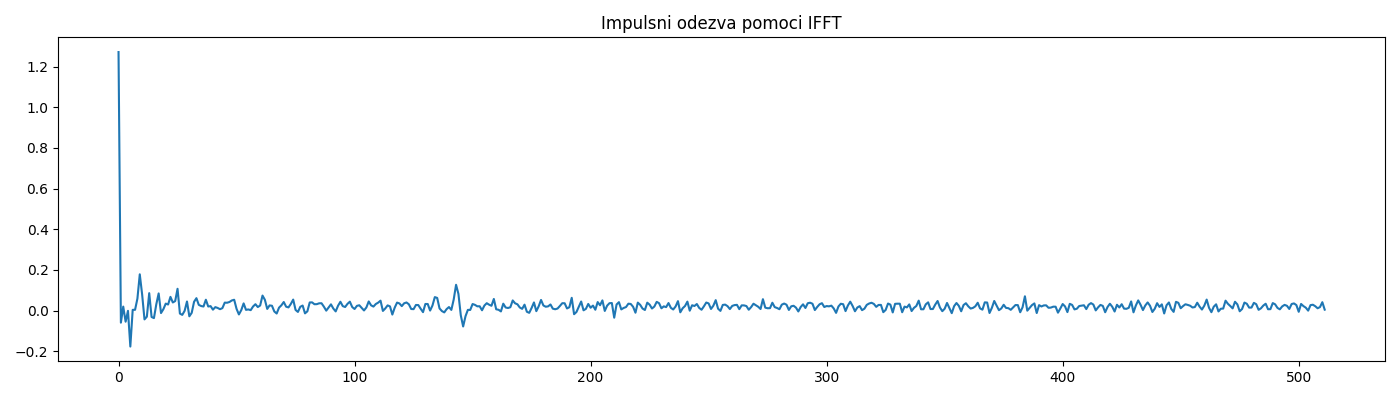

/home/btk/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<IPython.core.display.Javascript object>


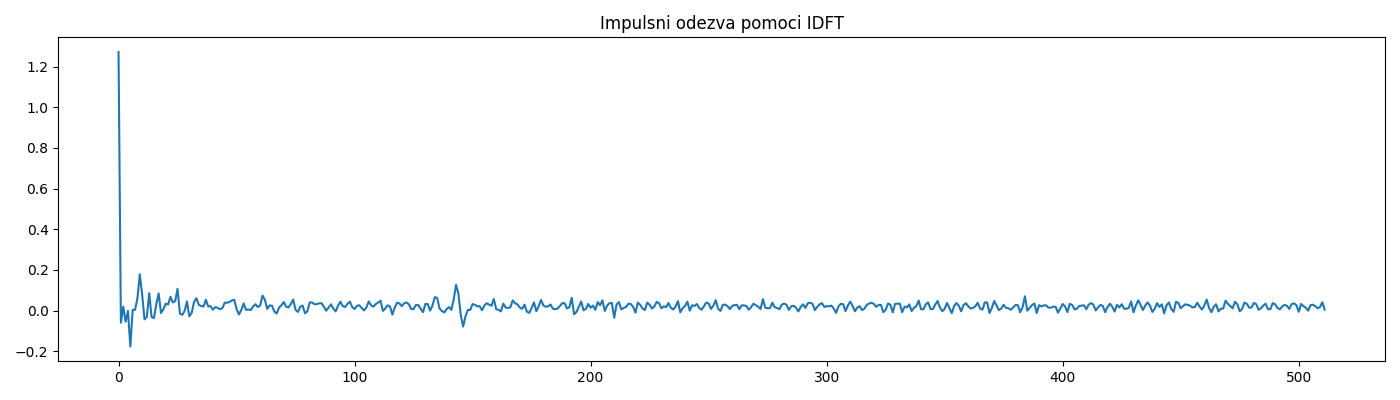

In [9]:
#Ukol 7
#------------------------------------------------------------------------
#------------------------------------------------------------------------
tone_freqchar_padded = [0 for i in range(N)]
#Naplneni
for vzorekCntr in range(512):
    tone_freqchar_padded[vzorekCntr]=tone_freqchar[vzorekCntr]
#IFFT
impulzniodezva_ifft = np.fft.ifft(tone_freqchar,1024)[0:512]
#------------------------------------------------------------------------
#IDFT
impulzniodezva_idft = [0 for i in range(N)]
for n in range(N):
    for k in range(N-1):
        impulzniodezva_idft[n] += tone_freqchar_padded[k]*np.e**(2*1j*np.pi*(k/N)*n)
    impulzniodezva_idft[n]=impulzniodezva_idft[n]/N

plt.figure(figsize=(14,4))
plt.plot(impulzniodezva_ifft,label="Imaginarni hodnoty")
plt.gca().set_title('Impulsni odezva pomoci IFFT')
plt.tight_layout()
plt.savefig('ukol7_ifft.eps')
plt.figure(figsize=(14,4))
plt.plot(impulzniodezva_idft[0:512])
plt.gca().set_title('Impulsni odezva pomoci IDFT')
plt.tight_layout()
plt.savefig('ukol7_idft.eps')

<IPython.core.display.Javascript object>

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

<IPython.core.display.Javascript object>


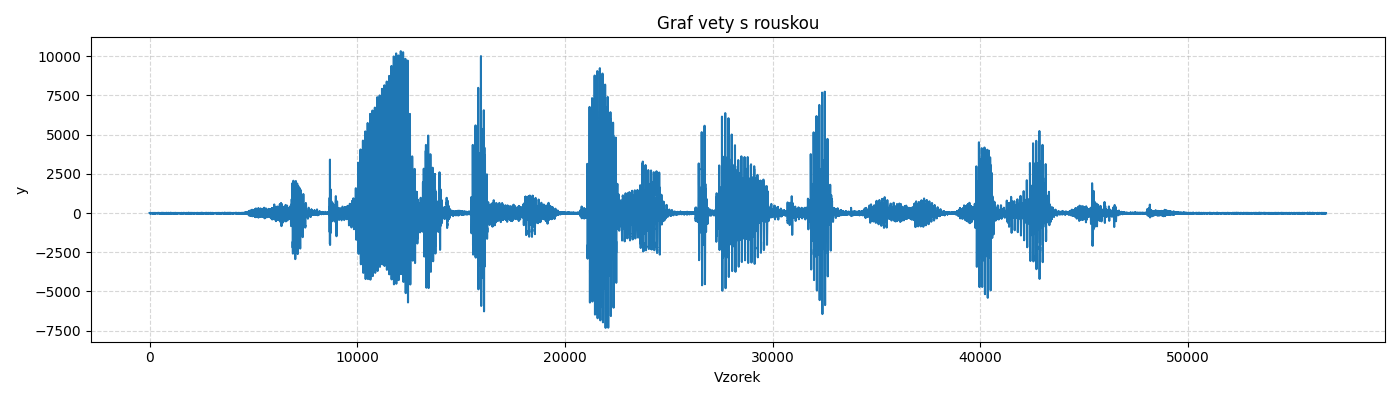

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

Veta bez/simulace


Ton bez/simulace


<IPython.core.display.Javascript object>

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

<IPython.core.display.Javascript object>


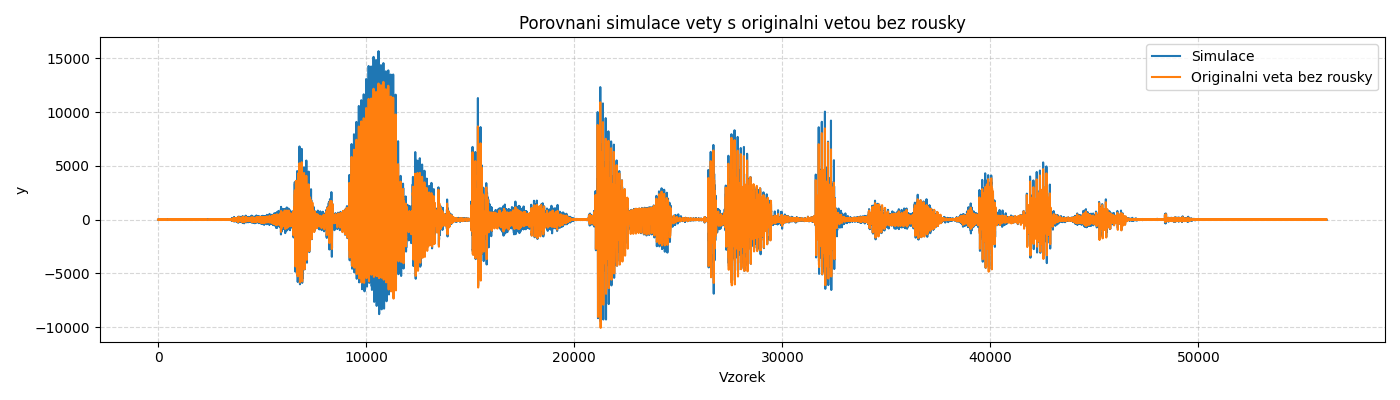

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

<IPython.core.display.Javascript object>


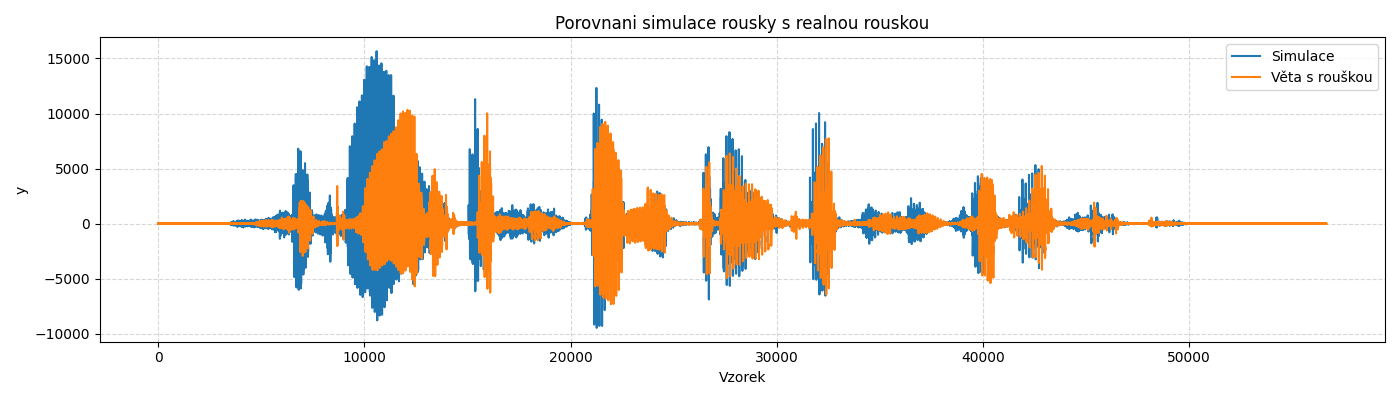

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [10]:
#Ukol 8
#------------------------------------------------------------------------
#------------------------------------------------------------------------
off_sentence = wavfile.read('../audio/maskoff_sentence.wav')[1]
on_sentence = wavfile.read('../audio/maskon_sentence.wav')[1]
#------------------------------------------------------------------------
on_sentence_sim = [0 for i in range(len(off_sentence))]
on_sentence_sim = lfilter(impulzniodezva_ifft[0:512].real,[1],off_sentence)

on_tone_sim = [0 for i in range(len(off_tone))]
on_tone_sim = lfilter(impulzniodezva_ifft[0:512].real,[1],off_tone)

#------------------------------------------------------------------------
plt.figure(figsize=(14,4))
plt.plot(off_sentence)
plt.grid(alpha=0.5, linestyle='--')
plt.gca().set_title('Graf vety bez rousky')
plt.xlabel("Vzorek")
plt.ylabel("y")
plt.tight_layout()
plt.savefig('ukol8_off.eps')

plt.figure(figsize=(14,4))
plt.plot(on_sentence)
plt.grid(alpha=0.5, linestyle='--')
plt.gca().set_title('Graf vety s rouskou')
plt.xlabel("Vzorek")
plt.ylabel("y")
plt.tight_layout()
plt.savefig('ukol8_on.eps')
print("Veta bez/simulace")
IPython.display.display(IPython.display.Audio(off_sentence, rate=16000))
IPython.display.display(IPython.display.Audio(on_sentence_sim, rate=16000))
print("Ton bez/simulace")
IPython.display.display(IPython.display.Audio(off_tone, rate=16000))
IPython.display.display(IPython.display.Audio(on_tone_sim, rate=16000))

plt.figure(figsize=(14,4))
plt.plot(on_sentence_sim)
plt.grid(alpha=0.5, linestyle='--')
plt.gca().set_title('Simulace vety s rouskou')
plt.xlabel("Vzorek")
plt.ylabel("y")
plt.tight_layout()
plt.savefig('ukol8_on_sim.eps')

plt.figure(figsize=(14,4))
plt.plot(on_sentence_sim, label="Simulace")
plt.plot(off_sentence, label="Originalni veta bez rousky")
plt.legend()
plt.grid(alpha=0.5, linestyle='--')
plt.gca().set_title('Porovnani simulace vety s originalni vetou bez rousky')
plt.xlabel("Vzorek")
plt.ylabel("y")
plt.tight_layout()
plt.savefig('ukol8_sim_cmp.eps')

plt.figure(figsize=(14,4))
plt.plot(on_sentence_sim, label="Simulace")
plt.plot(on_sentence, label="Věta s rouškou")
plt.legend()
plt.grid(alpha=0.5, linestyle='--')
plt.gca().set_title('Porovnani simulace rousky s realnou rouskou')
plt.xlabel("Vzorek")
plt.ylabel("y")
plt.tight_layout()
plt.savefig('ukol8_on_sim_cmp.eps')